In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ml-olympiad-sustainable-urban-living/sample_submission.csv
/kaggle/input/ml-olympiad-sustainable-urban-living/train.csv
/kaggle/input/ml-olympiad-sustainable-urban-living/test.csv


In [2]:
df=pd.read_csv("/kaggle/input/ml-olympiad-sustainable-urban-living/train.csv")
df_test=pd.read_csv("/kaggle/input/ml-olympiad-sustainable-urban-living/test.csv")

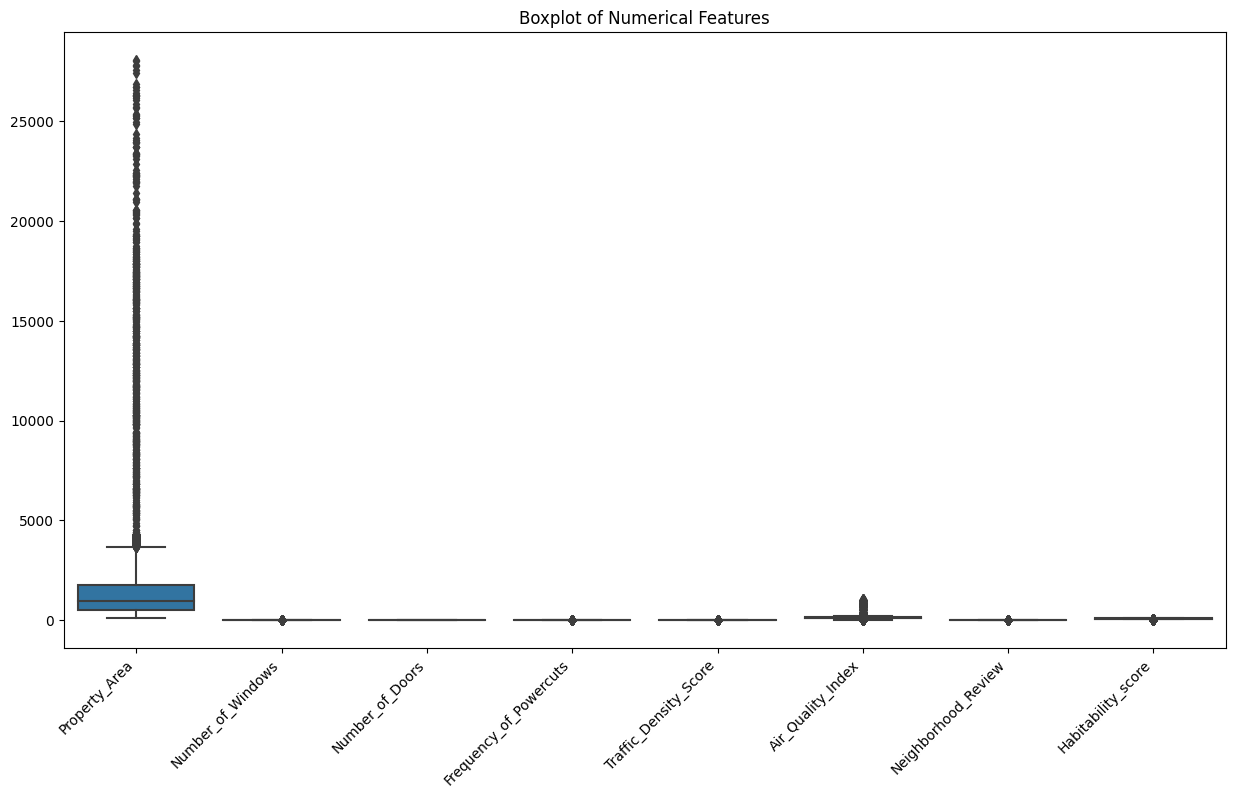

In [3]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create box plots to visualize outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[numerical_columns])
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45, ha='right')
plt.show()

# Handling the missing values

In [4]:
missing_values_count_df=df.isnull().sum()
print(missing_values_count_df)

missing_values_count_df_test=df_test.isnull().sum()
print(missing_values_count_df_test)

Id                           0
Property_Type                0
Property_Area                0
Number_of_Windows         1333
Number_of_Doors              0
Furnishing                 828
Frequency_of_Powercuts    1109
Power_Backup                 0
Water_Supply                 0
Traffic_Density_Score        0
Crime_Rate                 629
Dust_and_Noise             999
Air_Quality_Index            0
Neighborhood_Review          0
Habitability_score           0
dtype: int64
Id                          0
Property_Type               0
Property_Area               0
Number_of_Windows         321
Number_of_Doors             0
Furnishing                214
Frequency_of_Powercuts    274
Power_Backup                0
Water_Supply                0
Traffic_Density_Score       0
Crime_Rate                158
Dust_and_Noise            220
Air_Quality_Index           0
Neighborhood_Review         0
dtype: int64


**Remove missing values(30%)**

In [5]:
total_entries=df.shape[0]
percentage_missing=(missing_values_count_df/total_entries)*100
columns_with_high_missing = percentage_missing[percentage_missing >30].index
print("Columns with more than 50% missing values:")

Columns with more than 50% missing values:


Filling missing values

In [6]:
categorical_df = df.select_dtypes(include=['object'])
numeric_df = df.select_dtypes(exclude=['object'])
categorical_df_filled = categorical_df.apply(lambda x: x.fillna(x.mode()[0]))
numeric_df_filled = numeric_df.apply(lambda x: x.fillna(x.median()))


categorical_df_test = df_test.select_dtypes(include=['object'])
numeric_df_test = df_test.select_dtypes(exclude=['object'])
categorical_df_filled_test = categorical_df_test.apply(lambda x: x.fillna(x.mode()[0]))
numeric_df_filled_test = numeric_df_test.apply(lambda x: x.fillna(x.median()))



In [7]:
df = pd.concat([numeric_df_filled, categorical_df_filled], axis=1)
df_test=pd.concat([numeric_df_filled_test, categorical_df_filled_test], axis=1)

# Feature Encoding

In [8]:
categorical_df_filled


,Id,Property_Type,Furnishing,Power_Backup,Water_Supply,Crime_Rate,Dust_and_Noise
0,0x21e3,Apartment,Semi_Furnished,No,Once in a day - Morning,Slightly below average,Medium
1,0x68d4,Apartment,Unfurnished,No,Once in a day - Evening,Well below average,Medium
2,0x7d81,Apartment,Fully Furnished,No,Once in a day - Morning,Slightly below average,Medium
3,0x7a57,Apartment,Unfurnished,Yes,Once in a day - Morning,Well above average,Medium
4,0x9409,Bungalow,Fully Furnished,No,All time,Well below average,Medium
...,...,...,...,...,...,...,...
31594,0x4dbe,Apartment,Semi_Furnished,No,All time,Well below average,Medium
31595,0x41b3,Container Home,Fully Furnished,Yes,Once in a day - Morning,Well below average,Medium
31596,0x8531,Duplex,Semi_Furnished,No,Once in two days,Well below average,Medium
31597,0x2537,Apartment,Semi_Furnished,No,Once in a day - Morning,Well below average,Medium


In [9]:
categorical_df_test

,Id,Property_Type,Furnishing,Power_Backup,Water_Supply,Crime_Rate,Dust_and_Noise
0,0x6808,Single-family home,Unfurnished,No,All time,Well below average,Medium
1,0x6a98,Single-family home,Semi_Furnished,No,Once in a day - Morning,Well below average,Medium
2,0xacc0,Apartment,Unfurnished,No,All time,Well below average,Medium
3,0x8225,Single-family home,Semi_Furnished,No,Once in a day - Evening,Well below average,Medium
4,0xaee8,Single-family home,Fully Furnished,No,Once in a day - Evening,Slightly below average,Medium
...,...,...,...,...,...,...,...
7895,0x6e26,Single-family home,NaN,No,All time,Slightly above average,Medium
7896,0xa013,Apartment,Fully Furnished,No,All time,Slightly above average,Medium
7897,0x9721,Bungalow,Unfurnished,Yes,Once in two days,Well below average,Medium
7898,0x7e25,Single-family home,Semi_Furnished,No,Once in a day - Morning,Slightly above average,NaN


In [10]:
# Furnishing- lable encoding
unique_furnishing=df['Furnishing'].unique()
print(unique_furnishing)
#'Semi_Furnished-1', 'Unfurnished-0', 'Fully Furnished-2'
# Mapping dictionary;
mapping = {'Semi_Furnished':1, 'Unfurnished':0, 'Fully Furnished':2 }
df["Furnishing"] = df["Furnishing"].map(mapping)
df.rename(columns={"Furnishing": "Furnishing"}, inplace=True)
print(df["Furnishing"])


# Furnishing- lable encoding
unique_furnishing=df_test['Furnishing'].unique()
print(unique_furnishing)
#'Semi_Furnished-1', 'Unfurnished-0', 'Fully Furnished-2'
# Mapping dictionary;
mapping = {'Semi_Furnished':1, 'Unfurnished':0, 'Fully Furnished':2 }
df_test["Furnishing"] = df_test["Furnishing"].map(mapping)
df_test.rename(columns={"Furnishing": "Furnishing"}, inplace=True)
print(df_test["Furnishing"])

['Semi_Furnished' 'Unfurnished' 'Fully Furnished']
0        1
1        0
2        2
3        0
4        2
        ..
31594    1
31595    2
31596    1
31597    1
31598    1
Name: Furnishing, Length: 31599, dtype: int64
['Unfurnished' 'Semi_Furnished' 'Fully Furnished']
0       0
1       1
2       0
3       1
4       2
       ..
7895    1
7896    2
7897    0
7898    1
7899    2
Name: Furnishing, Length: 7900, dtype: int64


In [11]:
unique_property_type=df['Property_Type'].unique()
print(unique_property_type)
# One-hot encode the column
property_encoded_column = pd.get_dummies(df['Property_Type'], prefix='Property_Type')
# Drop the original column
df = df.drop('Property_Type', axis=1)
# Add the encoded columns to the original DataFrame
df = df.join(property_encoded_column)
print(df)


unique_property_type=df_test['Property_Type'].unique()
print(unique_property_type)
# One-hot encode the column
property_encoded_column = pd.get_dummies(df_test['Property_Type'], prefix='Property_Type')
# Drop the original column
df_test = df_test.drop('Property_Type', axis=1)
# Add the encoded columns to the original DataFrame
df_test = df_test.join(property_encoded_column)
print(df_test)


['Apartment' 'Bungalow' 'Single-family home' 'Duplex' '#R%$G&867'
 'Container Home']
       Property_Area  Number_of_Windows  Number_of_Doors  \
0                106                4.0                1   
1                733                2.0                2   
2                737                4.0                2   
3                900                3.0                2   
4               2238               14.0                6   
...              ...                ...              ...   
31594            851                4.0                1   
31595            315                1.0                1   
31596            480                6.0                3   
31597            642                1.0                2   
31598           1738                4.0                4   

       Frequency_of_Powercuts  Traffic_Density_Score  Air_Quality_Index  \
0                         0.0                   5.89               90.0   
1                         1.0               

In [12]:
unique_power_backup=df['Power_Backup'].unique()
print(unique_power_backup)
# Power_Backup- lable encoding#binary values 0 or 1
# Mapping dictionary;
mapping = {'No':0,'Yes':1,'NOT MENTIONED':0}
df["Power_Backup"] = df["Power_Backup"].map(mapping)
df.rename(columns={"Power_Backup": "Power_Backup"}, inplace=True)
print(df["Power_Backup"])

unique_power_backup=df_test['Power_Backup'].unique()
print(unique_power_backup)
df_test["Power_Backup"] = df_test["Power_Backup"].map(mapping)
df_test.rename(columns={"Power_Backup": "Power_Backup"}, inplace=True)
print(df_test["Power_Backup"])

['No' 'Yes' 'NOT MENTIONED']
0        0
1        0
2        0
3        1
4        0
        ..
31594    0
31595    1
31596    0
31597    0
31598    0
Name: Power_Backup, Length: 31599, dtype: int64
['No' 'Yes' 'NOT MENTIONED']
0       0
1       0
2       0
3       0
4       0
       ..
7895    0
7896    0
7897    1
7898    0
7899    0
Name: Power_Backup, Length: 7900, dtype: int64


In [13]:
# Water_Supply- lable encoding
unique_water_supply=df['Water_Supply'].unique()
print(unique_water_supply)
water_encoded_column = pd.get_dummies(df['Water_Supply'], prefix='Water_Supply')
# Drop the original column
df = df.drop('Water_Supply', axis=1)
df = df.join(water_encoded_column)  # Add the encoded columns to the original DataFrame
print(df)

unique_water_supply=df_test['Water_Supply'].unique()
df_test =df_test.drop('Water_Supply', axis=1)
df_test = df_test.join(water_encoded_column)  # Add the encoded columns to the original DataFrame
print(df_test)



['Once in a day - Morning' 'Once in a day - Evening' 'All time'
 'NOT MENTIONED' 'Once in two days']
       Property_Area  Number_of_Windows  Number_of_Doors  \
0                106                4.0                1   
1                733                2.0                2   
2                737                4.0                2   
3                900                3.0                2   
4               2238               14.0                6   
...              ...                ...              ...   
31594            851                4.0                1   
31595            315                1.0                1   
31596            480                6.0                3   
31597            642                1.0                2   
31598           1738                4.0                4   

       Frequency_of_Powercuts  Traffic_Density_Score  Air_Quality_Index  \
0                         0.0                   5.89               90.0   
1                         1.

In [14]:
# Dust_and_Noise- lable encoding
unique_dust_and_noise=df['Dust_and_Noise'].unique()
print(unique_dust_and_noise)
# Mapping dictionary
mapping = {'Medium':2, 'High':1, 'Low':3}
df["Dust_and_Noise"] = df["Dust_and_Noise"].map(mapping)
df.rename(columns={"Dust_and_Noise": "Dust_and_Noise"}, inplace=True)
print(df["Dust_and_Noise"])

# Dust_and_Noise- lable encoding
unique_dust_and_noise=df_test['Dust_and_Noise'].unique()
df_test["Dust_and_Noise"] = df_test["Dust_and_Noise"].map(mapping)
df_test.rename(columns={"Dust_and_Noise": "Dust_and_Noise"}, inplace=True)
print(df_test["Dust_and_Noise"])

['Medium' 'High' 'Low']
0        2
1        2
2        2
3        2
4        2
        ..
31594    2
31595    2
31596    2
31597    2
31598    2
Name: Dust_and_Noise, Length: 31599, dtype: int64
0       2
1       2
2       2
3       2
4       2
       ..
7895    2
7896    2
7897    2
7898    2
7899    1
Name: Dust_and_Noise, Length: 7900, dtype: int64


In [15]:
# Crime_Rate- lable encoding
unique_crime_rate=df['Crime_Rate'].unique()
print(unique_water_supply)
# Mapping dictionary
mapping = {'Slightly below average':3, 'Well below average':4,'Well above average':1, 'Slightly above average':2}
df["Crime_Rate"] = df["Crime_Rate"].map(mapping)
df.rename(columns={"Crime_Rate": "Crime_Rate"}, inplace=True)
print(df["Crime_Rate"])


# Crime_Rate- lable encoding
unique_crime_rate=df_test['Crime_Rate'].unique()
df_test["Crime_Rate"] = df_test["Crime_Rate"].map(mapping)
df_test.rename(columns={"Crime_Rate": "Crime_Rate"}, inplace=True)
print(df_test["Crime_Rate"])


['All time' 'Once in a day - Morning' 'Once in a day - Evening'
 'Once in two days' 'NOT MENTIONED']
0        3
1        4
2        3
3        1
4        4
        ..
31594    4
31595    4
31596    4
31597    4
31598    4
Name: Crime_Rate, Length: 31599, dtype: int64
0       4
1       4
2       4
3       4
4       3
       ..
7895    2
7896    2
7897    4
7898    2
7899    4
Name: Crime_Rate, Length: 7900, dtype: int64


In [16]:
df.head()


,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Habitability_score,Id,Furnishing,...,Property_Type_Apartment,Property_Type_Bungalow,Property_Type_Container Home,Property_Type_Duplex,Property_Type_Single-family home,Water_Supply_All time,Water_Supply_NOT MENTIONED,Water_Supply_Once in a day - Evening,Water_Supply_Once in a day - Morning,Water_Supply_Once in two days
0,106,4.0,1,0.0,5.89,90.0,3.86,71.98,0x21e3,1,...,True,False,False,False,False,False,False,False,True,False
1,733,2.0,2,1.0,4.37,96.0,3.55,71.20,0x68d4,0,...,True,False,False,False,False,False,False,True,False,False
2,737,4.0,2,0.0,7.45,121.0,3.81,71.39,0x7d81,2,...,True,False,False,False,False,False,False,False,True,False
3,900,3.0,2,2.0,6.16,100.0,1.34,31.46,0x7a57,0,...,True,False,False,False,False,False,False,False,True,False
4,2238,14.0,6,0.0,5.46,116.0,4.77,93.70,0x9409,2,...,False,True,False,False,False,True,False,False,False,False


In [17]:
df_test.head()

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Id,Furnishing,Power_Backup,...,Property_Type_Apartment,Property_Type_Bungalow,Property_Type_Container Home,Property_Type_Duplex,Property_Type_Single-family home,Water_Supply_All time,Water_Supply_NOT MENTIONED,Water_Supply_Once in a day - Evening,Water_Supply_Once in a day - Morning,Water_Supply_Once in two days
0,1521,5.0,1,0.0,7.61,156.0,4.71,0x6808,0,0,...,False,False,False,False,True,False,False,False,True,False
1,2233,2.0,1,0.0,5.28,82.0,4.50,0x6a98,1,0,...,False,False,False,False,True,False,False,True,False,False
2,986,1.0,1,0.0,7.72,91.0,4.79,0xacc0,0,0,...,True,False,False,False,False,False,False,False,True,False
3,1625,2.0,1,0.0,6.19,159.0,4.09,0x8225,1,0,...,False,False,False,False,True,False,False,False,True,False
4,1166,2.0,2,0.0,5.84,82.0,3.56,0xaee8,2,0,...,False,False,False,False,True,True,False,False,False,False


                                      Property_Area  Number_of_Windows  \
Property_Area                              1.000000           0.259347   
Number_of_Windows                          0.259347           1.000000   
Number_of_Doors                            0.217901           0.389537   
Frequency_of_Powercuts                    -0.000303          -0.007482   
Traffic_Density_Score                      0.003493           0.000010   
Air_Quality_Index                          0.000174           0.002666   
Neighborhood_Review                        0.014429           0.009140   
Habitability_score                         0.066577           0.096664   
Furnishing                                -0.007548          -0.005766   
Power_Backup                               0.007223           0.004314   
Crime_Rate                                 0.014808           0.002260   
Dust_and_Noise                            -0.006826           0.001877   
Property_Type_#R%$G&867               

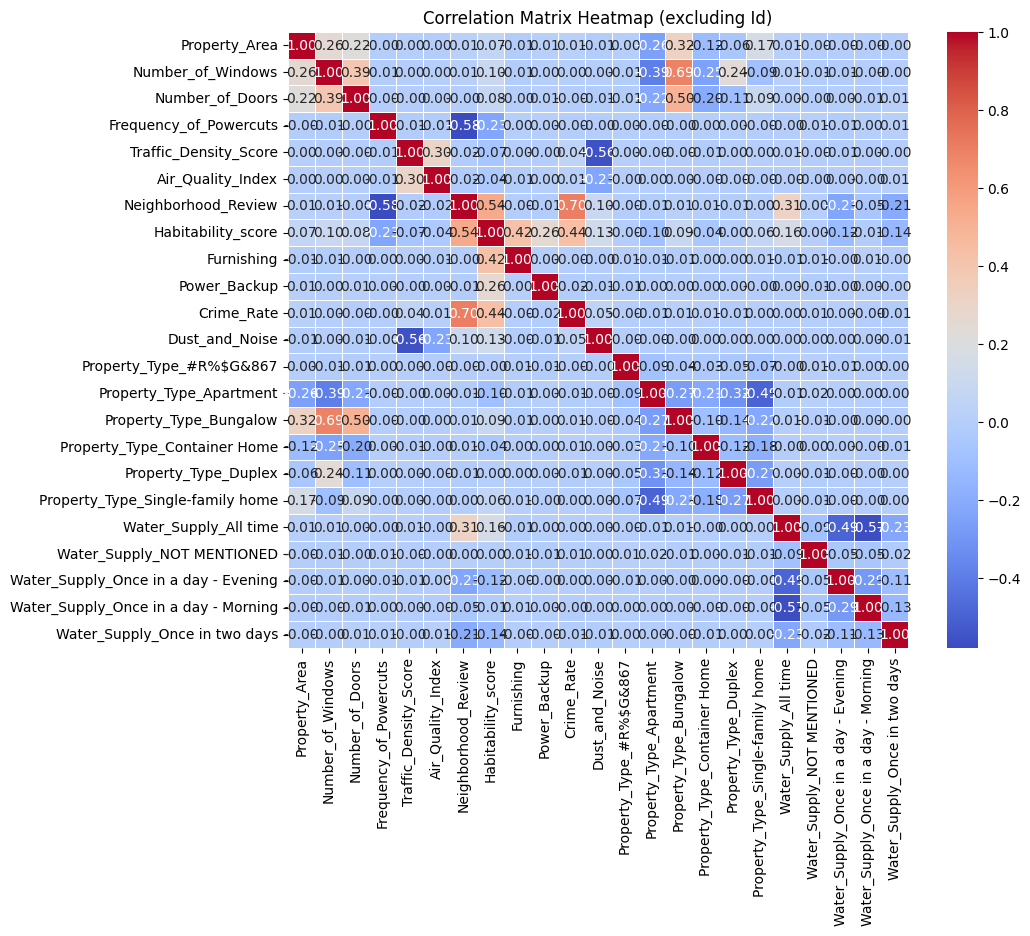

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.drop('Id', axis=1).corr()

print(correlation_matrix)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap (excluding Id)')
plt.show()

In [19]:
df
df_test

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Id,Furnishing,Power_Backup,...,Property_Type_Apartment,Property_Type_Bungalow,Property_Type_Container Home,Property_Type_Duplex,Property_Type_Single-family home,Water_Supply_All time,Water_Supply_NOT MENTIONED,Water_Supply_Once in a day - Evening,Water_Supply_Once in a day - Morning,Water_Supply_Once in two days
0,1521,5.0,1,0.0,7.61,156.0,4.71,0x6808,0,0,...,False,False,False,False,True,False,False,False,True,False
1,2233,2.0,1,0.0,5.28,82.0,4.50,0x6a98,1,0,...,False,False,False,False,True,False,False,True,False,False
2,986,1.0,1,0.0,7.72,91.0,4.79,0xacc0,0,0,...,True,False,False,False,False,False,False,False,True,False
3,1625,2.0,1,0.0,6.19,159.0,4.09,0x8225,1,0,...,False,False,False,False,True,False,False,False,True,False
4,1166,2.0,2,0.0,5.84,82.0,3.56,0xaee8,2,0,...,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7895,1120,3.0,2,0.0,5.55,80.0,3.56,0x6e26,1,0,...,False,False,False,False,True,True,False,False,False,False
7896,445,1.0,3,1.0,5.70,86.0,2.93,0xa013,2,0,...,True,False,False,False,False,False,False,True,False,False
7897,3780,6.0,6,0.0,6.84,137.0,3.80,0x9721,0,1,...,False,True,False,False,False,True,False,False,False,False
7898,1266,3.0,1,0.0,4.60,88.0,3.25,0x7e25,1,0,...,False,False,False,False,True,False,False,True,False,False


In [20]:
id_dataframe = df[['Id']].copy()
df
id_dataframe_test = df_test[['Id']].copy()
df_test

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Id,Furnishing,Power_Backup,...,Property_Type_Apartment,Property_Type_Bungalow,Property_Type_Container Home,Property_Type_Duplex,Property_Type_Single-family home,Water_Supply_All time,Water_Supply_NOT MENTIONED,Water_Supply_Once in a day - Evening,Water_Supply_Once in a day - Morning,Water_Supply_Once in two days
0,1521,5.0,1,0.0,7.61,156.0,4.71,0x6808,0,0,...,False,False,False,False,True,False,False,False,True,False
1,2233,2.0,1,0.0,5.28,82.0,4.50,0x6a98,1,0,...,False,False,False,False,True,False,False,True,False,False
2,986,1.0,1,0.0,7.72,91.0,4.79,0xacc0,0,0,...,True,False,False,False,False,False,False,False,True,False
3,1625,2.0,1,0.0,6.19,159.0,4.09,0x8225,1,0,...,False,False,False,False,True,False,False,False,True,False
4,1166,2.0,2,0.0,5.84,82.0,3.56,0xaee8,2,0,...,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7895,1120,3.0,2,0.0,5.55,80.0,3.56,0x6e26,1,0,...,False,False,False,False,True,True,False,False,False,False
7896,445,1.0,3,1.0,5.70,86.0,2.93,0xa013,2,0,...,True,False,False,False,False,False,False,True,False,False
7897,3780,6.0,6,0.0,6.84,137.0,3.80,0x9721,0,1,...,False,True,False,False,False,True,False,False,False,False
7898,1266,3.0,1,0.0,4.60,88.0,3.25,0x7e25,1,0,...,False,False,False,False,True,False,False,True,False,False


In [21]:
df=df.drop('Id',axis=1)
df_test=df_test.drop('Id',axis=1)

# Scaling

In [22]:
from sklearn.preprocessing import MinMaxScaler

# Define the columns to be scaled
to_scale = ['Property_Area', 'Air_Quality_Index']

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the specified columns
df[to_scale] = scaler.fit_transform(df[to_scale])
# Set the data types of the scaled columns to 'float'
df[to_scale] = df[to_scale].astype(float)

df_test[to_scale] = scaler.fit_transform(df_test[to_scale])
# Set the data types of the scaled columns to 'float'
df_test[to_scale] = df_test[to_scale].astype(float)

In [23]:
df

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Habitability_score,Furnishing,Power_Backup,...,Property_Type_Apartment,Property_Type_Bungalow,Property_Type_Container Home,Property_Type_Duplex,Property_Type_Single-family home,Water_Supply_All time,Water_Supply_NOT MENTIONED,Water_Supply_Once in a day - Evening,Water_Supply_Once in a day - Morning,Water_Supply_Once in two days
0,0.000215,4.0,1,0.0,5.89,0.086207,3.86,71.98,1,0,...,True,False,False,False,False,False,False,False,True,False
1,0.022636,2.0,2,1.0,4.37,0.091954,3.55,71.20,0,0,...,True,False,False,False,False,False,False,True,False,False
2,0.022779,4.0,2,0.0,7.45,0.115900,3.81,71.39,2,0,...,True,False,False,False,False,False,False,False,True,False
3,0.028608,3.0,2,2.0,6.16,0.095785,1.34,31.46,0,1,...,True,False,False,False,False,False,False,False,True,False
4,0.076455,14.0,6,0.0,5.46,0.111111,4.77,93.70,2,0,...,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31594,0.026856,4.0,1,0.0,7.80,0.142720,4.72,73.12,1,0,...,True,False,False,False,False,True,False,False,False,False
31595,0.007688,1.0,1,0.0,5.92,0.078544,4.50,95.40,2,1,...,False,False,True,False,False,False,False,False,True,False
31596,0.013589,6.0,3,0.0,5.68,0.076628,3.88,81.29,1,0,...,False,False,False,True,False,False,False,False,False,True
31597,0.019382,1.0,2,1.0,7.09,0.155172,3.76,82.80,1,0,...,True,False,False,False,False,False,False,False,True,False


In [24]:
df_test

,Property_Area,Number_of_Windows,Number_of_Doors,Frequency_of_Powercuts,Traffic_Density_Score,Air_Quality_Index,Neighborhood_Review,Furnishing,Power_Backup,Crime_Rate,...,Property_Type_Apartment,Property_Type_Bungalow,Property_Type_Container Home,Property_Type_Duplex,Property_Type_Single-family home,Water_Supply_All time,Water_Supply_NOT MENTIONED,Water_Supply_Once in a day - Evening,Water_Supply_Once in a day - Morning,Water_Supply_Once in two days
0,0.050828,5.0,1,0.0,7.61,0.156,4.71,0,0,4,...,False,False,False,False,True,False,False,False,True,False
1,0.076296,2.0,1,0.0,5.28,0.082,4.50,1,0,4,...,False,False,False,False,True,False,False,True,False,False
2,0.031692,1.0,1,0.0,7.72,0.091,4.79,0,0,4,...,True,False,False,False,False,False,False,False,True,False
3,0.054548,2.0,1,0.0,6.19,0.159,4.09,1,0,4,...,False,False,False,False,True,False,False,False,True,False
4,0.038130,2.0,2,0.0,5.84,0.082,3.56,2,0,3,...,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7895,0.036485,3.0,2,0.0,5.55,0.080,3.56,1,0,2,...,False,False,False,False,True,True,False,False,False,False
7896,0.012340,1.0,3,1.0,5.70,0.086,2.93,2,0,2,...,True,False,False,False,False,False,False,True,False,False
7897,0.131631,6.0,6,0.0,6.84,0.137,3.80,0,1,4,...,False,True,False,False,False,True,False,False,False,False
7898,0.041707,3.0,1,0.0,4.60,0.088,3.25,1,0,2,...,False,False,False,False,True,False,False,True,False,False


# Regression

with hyper parameter tuning

In [25]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import numpy as np

# X and y definitions
X = df.drop('Habitability_score', axis=1)
y = df['Habitability_score']

# Split X and y into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Set the parameters for the model
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'reg_alpha': 1,
    'reg_lambda': 1
}

# Train the model
model1 = xgb.XGBRegressor(**params,
                         verbosity=0)

model1.fit(X_train, y_train,
          eval_set=[(X_valid, y_valid)],
          early_stopping_rounds=10)

# Make predictions on the validation data
y_pred = model1.predict(X_valid)

# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print(f"Rmse for trained model is: {rmse:.2f}")

[0]	validation_0-rmse:10.90778
[1]	validation_0-rmse:9.07511
[2]	validation_0-rmse:8.01082
[3]	validation_0-rmse:7.36124
[4]	validation_0-rmse:6.98165
[5]	validation_0-rmse:6.77231
[6]	validation_0-rmse:6.62513
[7]	validation_0-rmse:6.55346
[8]	validation_0-rmse:6.48050
[9]	validation_0-rmse:6.41212
[10]	validation_0-rmse:6.39176
[11]	validation_0-rmse:6.37011
[12]	validation_0-rmse:6.35420
[13]	validation_0-rmse:6.33671
[14]	validation_0-rmse:6.32940
[15]	validation_0-rmse:6.28484
[16]	validation_0-rmse:6.28237
[17]	validation_0-rmse:6.28046
[18]	validation_0-rmse:6.27250


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:6.27315
[20]	validation_0-rmse:6.26469
[21]	validation_0-rmse:6.25784
[22]	validation_0-rmse:6.25942
[23]	validation_0-rmse:6.26109
[24]	validation_0-rmse:6.26002
[25]	validation_0-rmse:6.26171
[26]	validation_0-rmse:6.26144
[27]	validation_0-rmse:6.26774
[28]	validation_0-rmse:6.24913
[29]	validation_0-rmse:6.24521
[30]	validation_0-rmse:6.24238
[31]	validation_0-rmse:6.24496
[32]	validation_0-rmse:6.24316
[33]	validation_0-rmse:6.24119
[34]	validation_0-rmse:6.24248
[35]	validation_0-rmse:6.23754
[36]	validation_0-rmse:6.21916
[37]	validation_0-rmse:6.21721
[38]	validation_0-rmse:6.22074
[39]	validation_0-rmse:6.21923
[40]	validation_0-rmse:6.21357
[41]	validation_0-rmse:6.21775
[42]	validation_0-rmse:6.21715
[43]	validation_0-rmse:6.20737
[44]	validation_0-rmse:6.20847
[45]	validation_0-rmse:6.20524
[46]	validation_0-rmse:6.20062
[47]	validation_0-rmse:6.20083
[48]	validation_0-rmse:6.20197
[49]	validation_0-rmse:6.20672
[50]	validation_0-rmse:6.20916
[51]	val

With Hyperparameter Tuning

In [26]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import numpy as np

# X and y definitions
X = df.drop('Habitability_score', axis=1)
y = df['Habitability_score']

# Split X and y into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Set the parameters for the model
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'
}

# Train the model
model2 = xgb.XGBRegressor(**params,
                         verbosity=0)

model2.fit(X_train, y_train,
          eval_set=[(X_valid, y_valid)],
          early_stopping_rounds=10)

# Make predictions on the validation data
y_pred = model2.predict(X_valid)

# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print(f"Rmse for trained model is: {rmse:.2f}")

# Define the hyperparameters to tune
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500, 1000]
}

# Train the model with cross-validation
grid_search = GridSearchCV(estimator=model2,
                           param_grid=param_grid,
                           cv=5,
                           scoring=None,
                           return_train_score=False)

grid_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model2 = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best parameters
print("Best Parameters: {}".format(best_params))

# Make predictions on the validation data using the best model
y_pred = best_model2.predict(X_valid)

# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print(f"Rmse for the best model is: {rmse:.2f}")

[0]	validation_0-rmse:10.90727
[1]	validation_0-rmse:9.07435
[2]	validation_0-rmse:8.01001
[3]	validation_0-rmse:7.36160
[4]	validation_0-rmse:6.97641
[5]	validation_0-rmse:6.76050
[6]	validation_0-rmse:6.61014
[7]	validation_0-rmse:6.52683
[8]	validation_0-rmse:6.46371
[9]	validation_0-rmse:6.41754
[10]	validation_0-rmse:6.39004
[11]	validation_0-rmse:6.36894
[12]	validation_0-rmse:6.34937
[13]	validation_0-rmse:6.34479
[14]	validation_0-rmse:6.33842
[15]	validation_0-rmse:6.33357
[16]	validation_0-rmse:6.30470
[17]	validation_0-rmse:6.28985
[18]	validation_0-rmse:6.28478
[19]	validation_0-rmse:6.26516
[20]	validation_0-rmse:6.25604
[21]	validation_0-rmse:6.25164
[22]	validation_0-rmse:6.24538


/opt/conda/lib/python3.10/site-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:6.23682
[24]	validation_0-rmse:6.24523
[25]	validation_0-rmse:6.25032
[26]	validation_0-rmse:6.25190
[27]	validation_0-rmse:6.24982
[28]	validation_0-rmse:6.25278
[29]	validation_0-rmse:6.25387
[30]	validation_0-rmse:6.25262
[31]	validation_0-rmse:6.25377
[32]	validation_0-rmse:6.25574
[33]	validation_0-rmse:6.25618
Rmse for trained model is: 6.24
Best Parameters: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 1000}
Rmse for the best model is: 6.04


Random Forest Regression





In [27]:
# import pandas as pd
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error

# # Dropping the response column
# X = df.drop('Habitability_score', axis=1)

# # Separating response column
# y = df['Habitability_score']

# # Splitting the data into training and validation sets
# X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# # Creating the RandomForestRegressor object
# rf = RandomForestRegressor(n_estimators=100, random_state=42)

# # Setting up the hyperparameter grid
# param_grid = {
#     'n_estimators': [100, 500, 1000],
#     'max_depth': [3, 5, 7],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Using GridSearchCV to find the best hyperparameters
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring=None, return_train_score=False)
# grid_search.fit(X_train, y_train)

# # Printing the best hyperparameters
# print("Best Parameters: {}".format(grid_search.best_params_))

# # Using the best model to make predictions
# y_pred = grid_search.best_estimator_.predict(X_valid)

# # Calculating the root mean squared error
# rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
# print(f"Rmse for the best model is: {rmse:.2f}")

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Dropping the response column
X = df.drop('Habitability_score', axis=1)

# Separating response column
y = df['Habitability_score']

# Splitting the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the RandomForestRegressor object
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model
rf.fit(X_train, y_train)

# Making predictions
y_pred = rf.predict(X_valid)

# Calculating the root mean squared error
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print(f"Rmse for the trained model is: {rmse:.2f}")

Rmse for the trained model is: 5.97


SVM

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Dropping the response column
X = df.drop('Habitability_score', axis=1)

# Separating response column
y = df['Habitability_score']

# Splitting the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the SVR object with default hyperparameters
svr = SVR()

# Training the model
svr.fit(X_train, y_train)

# Using the best model to make predictions
y_pred = svr.predict(X_valid)

# Calculating the root mean squared error
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
print(f"Rmse for the trained model is: {rmse:.2f}")

# Printing the hyperparameters of the trained model
print("Hyperparameters:")
for key, value in svr.get_params().items():
    print(f"{key}: {value}")

Rmse for the trained model is: 8.73
Hyperparameters:
C: 1.0
cache_size: 200
coef0: 0.0
degree: 3
epsilon: 0.1
gamma: scale
kernel: rbf
max_iter: -1
shrinking: True
tol: 0.001
verbose: False


# Testing data

In [30]:
# Make predictions on the validation data
y_pred = rf.predict(df_test)
predicted_results = pd.DataFrame({'Habitability_score': y_pred})
print(predicted_results)

      Habitability_score
0                76.4921
1                79.3461
2                77.3804
3                78.3726
4                72.5812
...                  ...
7895             75.3146
7896             80.1634
7897             77.8527
7898             67.2233
7899             82.2486

[7900 rows x 1 columns]


In [31]:
result_combined = pd.concat([id_dataframe_test, predicted_results], axis=1)

In [32]:
print(result_combined)

          Id  Habitability_score
0     0x6808             76.4921
1     0x6a98             79.3461
2     0xacc0             77.3804
3     0x8225             78.3726
4     0xaee8             72.5812
...      ...                 ...
7895  0x6e26             75.3146
7896  0xa013             80.1634
7897  0x9721             77.8527
7898  0x7e25             67.2233
7899  0x8cb4             82.2486

[7900 rows x 2 columns]


In [33]:
result_combined.to_csv('Sustainable_habitability_3.csv', index=False)